## Load data and Preprocessing data

In [1]:
from google.colab import drive
drive.mount("/drive")
import pandas as pd
from numpy import nan

Mounted at /drive


In [2]:
data = pd.read_csv("/drive/My Drive/Colab Notebooks/data/IST 736 projects/teaching tools/teaching.tools.feedback.csv")
corpus = data['teaching.tools.feedback'].tolist()
print(corpus)
#drop NA values in corpus
corpus=[item for item in corpus if not(pd.isnull(item)) == True]
print(corpus)

['See feedback from earlier comment about Blackboard.', 'Timing of changes is terrible', 'Access to Blackboard support is challenging. Once I get to the staff they are very competent and responsive.', 'International students accessing class and materials from some countries cannot access Google tools because of firewalls. ', 'I have had some unique challenges with playposit, kaltura and blackboard. I understand that my use cases are not the typical use cases.', 'Mid-semester changes have been made to teaching stations in certain classrooms without any kind of notice. This kind of alteration should be abstained from during the fall and spring semesters- save it for between semesters or during the summer.', 'I feel like the online teaching group has been pretty good about communicating resources. They have also been very prompt when I email with questions.', 'Answers is not a reliable resource for support and the Kaltura interface is not user friendly.', 'Seems like we get surprised ever

In [3]:
#print size in corpus
print('size of feedback is', len(corpus))

size of feedback is 147


# KMeans


tfidf representation

In [19]:
# tfidf representation
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,min_df=2,encoding='latin-1', binary=False, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

361


In [20]:
from sklearn.cluster import KMeans
K = 9
tfidf_model = KMeans(n_clusters=K, random_state=0)
tfidf_model.fit(tfidf)
labels=tfidf_model.labels_.tolist() 

In [21]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])

In [22]:
# Plot the inertia graph
import matplotlib.pyplot as plt
def plot_inertia(inertia_list):
  plt.plot(range(1,len(inertia_list)+1), inertia_list, 'bx-')
  plt.xlabel('Values of K')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method using Inertia')
  plt.show()

In [23]:
# use the Elbow method to determine the best k
def elbow(m, corpus):
  inertia_lst = []
  for i in range(1,m+1):
    model = KMeans(n_clusters=i)
    model.fit(corpus)
    
    inertia=model.inertia_
    inertia_lst.append(inertia)
  plot_inertia(inertia_lst)

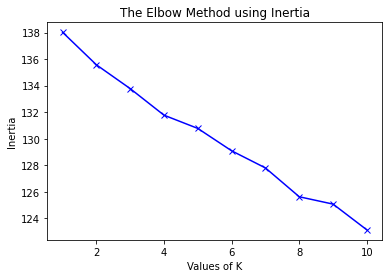

In [28]:
elbow(10, tfidf)

In [29]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)

In [30]:
print_cluster_sizes(tfidf_model)

{6: 40, 0: 24, 2: 14, 4: 5, 3: 14, 1: 17, 7: 13, 8: 11, 5: 9}


In [31]:
print_docs_closest_to_centroids(tfidf_model, tfidf, 5)



======cluster # 0
NONE
Some notifications have seemed sudden or last-minute (perhaps unavoidably).
none
I wouldn't know where to start.
Blackboard feels very old. The interfaces and interactivity of assignments + tests + grading + content presentation does not feel easily integrated, even though I think it intends to be. WORST PART ABOUT BLACKBOARD FOR ME: The forced HTML re-coding of basic messages (for annoucements, assignments, and emails) makes the results look terrible. I know HTML, so I sometimes go back in and "fix" it, but sometimes it's too much for me to deal with. Crafting visually compelling content is a nightmare.


======cluster # 1
NONE
Some notifications have seemed sudden or last-minute (perhaps unavoidably).
none
I love our ITS folks. They are very helpful once I reach out to them. But as a heavy Blackboard user, I think Blackboard really needs to invest more on user interface improvement. It's very difficult to re-arrange content, such as re-ordering course modules

unigram representation

In [32]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=2, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

361


In [33]:
from sklearn.cluster import KMeans

K = 7
uni_model = KMeans(n_clusters=K, random_state=0)
uni_model.fit(uni)
labels=uni_model.labels_.tolist() 

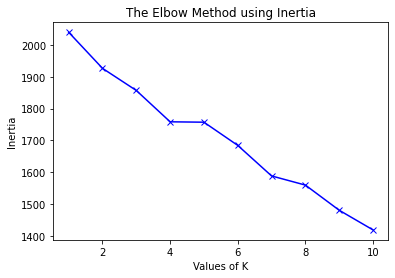

In [37]:
elbow(10, uni)

In [34]:
print_cluster_sizes(uni_model)

{0: 57, 1: 83, 2: 1, 4: 2, 5: 1, 6: 1, 3: 2}


In [35]:
print_docs_closest_to_centroids(uni_model, uni, 3)



======cluster # 0
Blackboard is evil and should be destroyed.
See feedback from earlier comment about Blackboard.
it is very difficult to get assessment data from blackboard.


======cluster # 1
NONE
Some notifications have seemed sudden or last-minute (perhaps unavoidably).
none


======cluster # 2
I feel that there are new teaching technology tools that exist out there but we are not aware of them. We don't know what we don't know. Sometimes I accidentally learn from colleagues or someone from IT about certain tools that exist for faculty but we never were informed of them and never had workshops. I would like Central IT (OLS) to hold college-by-college training (1-2 hours) at the beginning of every fall semester to inform us of new teaching technology and tools that are useful in teaching (related to student engagement, like Kahoot, video capturing and sharing, etc etc). Basically, a super short version of SITETL. I am a SITETL alum and I benefited so much from that summer a few y

# LDA


In [38]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tf-idf representation

In [39]:
# tfidf usually help improve topic models

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
print(len(tfidf_vectorizer.vocabulary_))

361


In [40]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 9

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tfidf)

In [41]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        no_top_words = 5
no_top_words = 5
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
jason webb resource start word
Topic 1:
effective user years interface discussion
Topic 2:
comment experience blackboard understand version
Topic 3:
blackboard problems responses helpful quick
Topic 4:
software better complicated blackboard intuitive
Topic 5:
upload difficult disconnected grading requires
Topic 6:
time emails updates nice changes
Topic 7:
love drive rely need group
Topic 8:
sure team technology zoom available


In [42]:
# now examine the topic distribution in each document
# since each document is considered a mixture of all topics with different probabilities
# lda_z stores the prob distribution for each document

print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(147, 9)
[0.04822555 0.04822313 0.61412969 0.0482771  0.04823972 0.04822435
 0.04822451 0.04822499 0.04823097]


Unigram representation

In [43]:
# unigram representation
from sklearn.feature_extraction.text import CountVectorizer
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, stop_words='english')
uni = unigram_count_vectorizer.fit_transform(corpus)
uni_feature_names = unigram_count_vectorizer.get_feature_names_out()
print(len(unigram_count_vectorizer.vocabulary_))

1113


In [44]:
# call the LDA algorithm to fit a topic model, and transform all documents to their topic distrinbutions
from sklearn.decomposition import NMF, LatentDirichletAllocation
no_topics = 7

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(uni)

In [45]:

no_top_words = 5
display_topics(lda, uni_feature_names, no_top_words)

Topic 0:
students like really easy respond
Topic 1:
friendly user effective pleasing visually
Topic 2:
blackboard support guide ve best
Topic 3:
blackboard team teaching sure tools
Topic 4:
blackboard software time like helpful
Topic 5:
blackboard use don know year
Topic 6:
don new know years exist


In [46]:
print(lda_z.shape)
print(lda_z[0])
#print(documents.shape)

(147, 7)
[0.02860267 0.02859401 0.02863595 0.02860701 0.82833286 0.02862829
 0.02859921]


# BERTopic

In [4]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 90 kB 5.0 MB/s 
     |████████████████████████████████| 5.2 MB 19.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 55.2 MB/s 
     |████████████████████████████████| 88 kB 8.1 MB/s 
     |████████████████████████████████| 85 kB 5.2 MB/s 
     |████████████████████████████████| 5.8 MB 57.4 MB/s 
     |████████████████████████████████| 1.3 MB 70.0 MB/s 
     |████████████████████████████████| 182 kB 53.9 MB/s 
     |████████████████████████████████| 7.6 MB 47.7 MB/s 
     |████████████████████████████████| 1.1 MB 40.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=2700884 sha256=858eaf5f2aa54c760f618c980ca48d32dce39ddc19d4b4dbb590e0d32e36e2e5
  Stored in directory: /root/.cache/

In [6]:
# obtain topic modelling results
print(len(corpus))

from bertopic import BERTopic
topic_model = BERTopic(embedding_model="all-MiniLM-L12-v2", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(corpus)

147


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/5 [00:00<?, ?it/s]

2022-12-14 02:33:47,634 - BERTopic - Transformed documents to Embeddings
2022-12-14 02:33:56,898 - BERTopic - Reduced dimensionality
2022-12-14 02:33:56,924 - BERTopic - Clustered reduced embeddings


In [7]:
# After generating topics and their probabilities, we can access the frequent topics that were generated
# -1 refers to all outliers and should typically be ignored. 

freq = topic_model.get_topic_info(); 
num_topics = len(freq) -1
print(num_topics)
freq.head(num_topics)

3


,Topic,Count,Name
0,-1,23,-1_to_the_and_is
1,0,58,0_blackboard_the_to_and
2,1,40,1_the_to_of_and


In [8]:
for i in range(num_topics):
  print("\n== Representative documents in cluster #", i)
  print(topic_model.get_representative_docs(i))


== Representative documents in cluster # 0
['Blackboard is the least intuitive software I have ever used, but I have become accustomed to it.', 'Blackboard is very cumbersome and not always easy to use.', "Blackboard is unnecessarily complicated and getting assistance from IT has been difficult, so generally I don't use it. "]

== Representative documents in cluster # 1
['I have to send a HUGE shoutout to the empathetic and knowledgeable miracle-workers at help@syr.edu. Despite having an in-house department, the people at central IT are my go-to. They help quickly, courteously and even offer to Zoom chat with me, sharing my screen to walk me through their instructions. LOVE, LOVE, LOVE having them for support. ', 'In general, very supportive of the ITS team. Just feel as though they need more resources to do their job well, inclusive of getting faculty to think about the best case use stories for these important technologies. ', 'When you do what you are supposed to do please do it in

In [10]:
topic_model.visualize_distribution(probs[2], min_probability=0.005)

In [11]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [12]:
topic_model.visualize_barchart(top_n_topics=10)

# SBERT


In [13]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from sentence_transformers import SentenceTransformer
embedder = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [15]:
sbert_embeddings = embedder.encode(corpus)

In [16]:
K = 7  # change number of cluster if applicable
from sklearn.cluster import KMeans
sbert_model = KMeans(n_clusters=K, random_state=1337)
sbert_model.fit(sbert_embeddings)
labels=sbert_model.labels_.tolist()  # Save cluster labels in a separate list

In [17]:
#  print cluster sizes
def print_cluster_sizes(model):
  cnt_perCluster = {}
  for c in model.labels_:
    cnt_perCluster[c] = cnt_perCluster.get(c, 0)+1
  print(cnt_perCluster)
print_cluster_sizes(sbert_model)

{2: 30, 1: 18, 4: 26, 3: 17, 6: 24, 0: 28, 5: 4}


In [18]:
# print documents closest to each centroid
import numpy as np
def print_docs_closest_to_centroids(model, vec, n):
  K = len(model.cluster_centers_)
  for j in range(K):
    d = model.transform(vec)[:, j]
    idx = np.argsort(d)[:n]
    print('\n\n======cluster #', j)
    for i in idx:
      print(corpus[i])
print_docs_closest_to_centroids(sbert_model, sbert_embeddings, 3)



======cluster # 0
The fundamental problem with blackboard, IMO, is that it presumes a specific organization of grading / course competencies that really have very little to do with how I organize my course.  I do use the quizzes, adaptive release criteria, and zoom integration, but the rest of it is a mystery and for the most part useless to me. 
The only reason I feel somewhat comfortable using blackboard is because of the ITS intensive SITL workshop. In my humble opinion, every SU instructor should be required to take it. It was so awesome!

Blackboard is very capable, but hard to learn. The new Tiny rich text editor requires a training workshop. I am still scratching the surface in regards to automatically grading exercises.

We are in the warehouse, support is far away. often times the connection of the real classroom and the online teaching is disconnected. (bad displays/projectors, bad audio  (poor microphone), bad video (poor webcam)

e.g. steps needed to include a sketch on t